In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [292]:
pd.set_option('display.max_columns', 500)

In [293]:
churn = pd.read_csv('test.csv')
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

# DATA ANALYSIS

In [294]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=171)

In [295]:
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.

# DATA CLEANING

##### checking the percentage of null values in data

In [296]:
(churn.isnull().sum().sum() / (churn.shape[0]*churn.shape[1])) * 100 

15.361617933723196

In [297]:
for i in churn.columns:
    print (f'{i} : {churn[i].isna().sum()} : {round(((churn[i].isnull().sum() / len(churn[i].index))*100),2)}')
 

id : 0 : 0.0
circle_id : 0 : 0.0
loc_og_t2o_mou : 316 : 1.05
std_og_t2o_mou : 316 : 1.05
loc_ic_t2o_mou : 316 : 1.05
last_date_of_month_6 : 0 : 0.0
last_date_of_month_7 : 202 : 0.67
last_date_of_month_8 : 367 : 1.22
arpu_6 : 0 : 0.0
arpu_7 : 0 : 0.0
arpu_8 : 0 : 0.0
onnet_mou_6 : 1169 : 3.9
onnet_mou_7 : 1172 : 3.91
onnet_mou_8 : 1675 : 5.58
offnet_mou_6 : 1169 : 3.9
offnet_mou_7 : 1172 : 3.91
offnet_mou_8 : 1675 : 5.58
roam_ic_mou_6 : 1169 : 3.9
roam_ic_mou_7 : 1172 : 3.91
roam_ic_mou_8 : 1675 : 5.58
roam_og_mou_6 : 1169 : 3.9
roam_og_mou_7 : 1172 : 3.91
roam_og_mou_8 : 1675 : 5.58
loc_og_t2t_mou_6 : 1169 : 3.9
loc_og_t2t_mou_7 : 1172 : 3.91
loc_og_t2t_mou_8 : 1675 : 5.58
loc_og_t2m_mou_6 : 1169 : 3.9
loc_og_t2m_mou_7 : 1172 : 3.91
loc_og_t2m_mou_8 : 1675 : 5.58
loc_og_t2f_mou_6 : 1169 : 3.9
loc_og_t2f_mou_7 : 1172 : 3.91
loc_og_t2f_mou_8 : 1675 : 5.58
loc_og_t2c_mou_6 : 1169 : 3.9
loc_og_t2c_mou_7 : 1172 : 3.91
loc_og_t2c_mou_8 : 1675 : 5.58
loc_og_mou_6 : 1169 : 3.9
loc_og_mou_7 : 1

In [298]:
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns


,null
arpu_3g_6,74.72
count_rech_3g_6,74.72
fb_user_6,74.72
night_pck_user_6,74.72
total_rech_data_6,74.72
...,...
last_day_rch_amt_8,0.00
vol_2g_mb_6,0.00
vol_2g_mb_7,0.00
vol_2g_mb_8,0.00


In [299]:
del_list = list(churn_missing_columns.index[churn_missing_columns['null'] > 40])


In [300]:
churn = churn.drop(del_list, axis=1)

In [301]:
churn.shape

(30000, 141)

##### getting all the unique values

In [302]:
for i in churn.columns:
    print(f'{i} : {churn[i].unique()}')

id : [69999 70000 70001 ... 99996 99997 99998]
circle_id : [109]
loc_og_t2o_mou : [ 0. nan]
std_og_t2o_mou : [ 0. nan]
loc_ic_t2o_mou : [ 0. nan]
last_date_of_month_6 : ['6/30/2014']
last_date_of_month_7 : ['7/31/2014' nan]
last_date_of_month_8 : ['8/31/2014' nan]
arpu_6 : [  91.882  414.168  329.844 ...  139.473 1122.912  318.98 ]
arpu_7 : [ 65.33  515.568 434.884 ...  38.23  781.121 307.89 ]
arpu_8 : [ 64.445 360.868 746.239 ... 180.194 257.439 605.32 ]
onnet_mou_6 : [ 31.78  75.51   7.54 ... 187.29 324.46 263.79]
onnet_mou_7 : [ 20.23  41.21   7.86 ... 172.38 250.01 467.24]
onnet_mou_8 : [ 23.11  19.84   8.4  ... 168.39 285.41 650.26]
offnet_mou_6 : [  60.16  474.34   16.98 ...  190.36 1854.09  107.78]
offnet_mou_7 : [  32.16  621.84   45.81 ...  169.78  953.58 1088.83]
offnet_mou_8 : [ 34.83 394.94  45.04 ... 221.96 189.76 331.64]
roam_ic_mou_6 : [  0.    22.81 123.31 ...  52.03  87.76 134.54]
roam_ic_mou_7 : [  0.   103.38 121.19 ...  20.86  21.66  67.79]
roam_ic_mou_8 : [  0.    

In [303]:
churn.std_og_t2o_mou.unique()

array([ 0., nan])

In [304]:
# dropping id, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_ic_t2o_mou_6, std_ic_mou_7, std_ic_mou_8, date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8
for i in ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']:
    del churn[i]


In [305]:
churn.shape

(30000, 125)

##### filtering high value customers

In [306]:
churn['avg_rech_amt_6_7'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2

In [307]:
# getting the 70th percentile
X = churn['avg_rech_amt_6_7'].quantile(0.7)
X

365.0

In [308]:
churn = churn[churn['avg_rech_amt_6_7'] >= X]
churn.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.0,0.0,0.0,0.0,0.0,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.00,296.33,339.64,281.66,0.00,0.0,0.0,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0
4,70003,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.0,0.0,0.0,0.0,0.0,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,509.03,629.43,749.29,0.0,0.0,0.0,0.71,5.39,4.96,2.2,0.0,0.0,514.79,638.28,779.78,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,13.96,32.46,0.0,0.0,1.61,0.0,0.0,43.59,53.73,115.93,159.26,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,11,7,8,356,490,546,90,130,130,50,130,130,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0
21,70020,452.601,369.418,372.545,1115.79,843.44,689.38,15.04,30.24,27.79,0.00,0.00,15.61,0.00,0.00,43.31,5.26,1.56,1.21,0.64,6.44,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.91,8.01,1.21,1110.53,841.88,653.61,14.39,23.79,19.03,0.0,0.0,0.0,1124.93,865.68,672.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1130.84,873.69,673.86,23.94,6.29,7.53,8.96,9.58,0.41,0.00,0.00,0.00,32.91,15.88,7.94,28.43,19.53,

In [309]:
churn.shape

(9020, 126)

##### handling missing values in rows

In [310]:
# Count the rows having more than 50% missing values
churn_missing_rows_50 = churn[(churn.isnull().sum(axis=1)) > (len(churn.columns)//2)]


In [311]:
churn_missing_rows_50.shape

(42, 126)

In [312]:
# Deleting the rows having more than 50% missing values
churn = churn.drop(churn_missing_rows_50.index)
churn.shape

(8978, 126)

In [313]:
# Checking the missing values in columns again
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
loc_ic_t2f_mou_8,2.71
loc_ic_t2t_mou_8,2.71
loc_og_t2c_mou_8,2.71
loc_og_mou_8,2.71
std_og_t2t_mou_8,2.71
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00


In [314]:
type(churn_missing_columns)

pandas.core.frame.DataFrame

In [315]:
round(((churn.isd_og_mou_8.isnull().sum()/len(churn.isd_og_mou_8.index))*100),2)

2.71

##### removing null value rows

In [316]:
for i in churn.columns:
    if round(((churn[i].isnull().sum()/len(churn[i].index))*100),2) != 0.0:
        print (f'{i} = {round(((churn[i].isnull().sum()/len(churn[i].index))*100),2)}')

onnet_mou_6 = 0.58
onnet_mou_7 = 0.6
onnet_mou_8 = 2.71
offnet_mou_6 = 0.58
offnet_mou_7 = 0.6
offnet_mou_8 = 2.71
roam_ic_mou_6 = 0.58
roam_ic_mou_7 = 0.6
roam_ic_mou_8 = 2.71
roam_og_mou_6 = 0.58
roam_og_mou_7 = 0.6
roam_og_mou_8 = 2.71
loc_og_t2t_mou_6 = 0.58
loc_og_t2t_mou_7 = 0.6
loc_og_t2t_mou_8 = 2.71
loc_og_t2m_mou_6 = 0.58
loc_og_t2m_mou_7 = 0.6
loc_og_t2m_mou_8 = 2.71
loc_og_t2f_mou_6 = 0.58
loc_og_t2f_mou_7 = 0.6
loc_og_t2f_mou_8 = 2.71
loc_og_t2c_mou_6 = 0.58
loc_og_t2c_mou_7 = 0.6
loc_og_t2c_mou_8 = 2.71
loc_og_mou_6 = 0.58
loc_og_mou_7 = 0.6
loc_og_mou_8 = 2.71
std_og_t2t_mou_6 = 0.58
std_og_t2t_mou_7 = 0.6
std_og_t2t_mou_8 = 2.71
std_og_t2m_mou_6 = 0.58
std_og_t2m_mou_7 = 0.6
std_og_t2m_mou_8 = 2.71
std_og_t2f_mou_6 = 0.58
std_og_t2f_mou_7 = 0.6
std_og_t2f_mou_8 = 2.71
std_og_mou_6 = 0.58
std_og_mou_7 = 0.6
std_og_mou_8 = 2.71
isd_og_mou_6 = 0.58
isd_og_mou_7 = 0.6
isd_og_mou_8 = 2.71
spl_og_mou_6 = 0.58
spl_og_mou_7 = 0.6
spl_og_mou_8 = 2.71
og_others_6 = 0.58
og_others

In [317]:
print(((churn_missing_columns[churn_missing_columns['null'] == 0.61]).index).to_list())

[]


In [318]:
print(((churn_missing_columns[churn_missing_columns['null'] == 0.68]).index).to_list())

[]


In [319]:
index_8 = ''
for i in ((churn_missing_columns[churn_missing_columns['null'] == 2.75]).index).to_list():
    index_8 += f'(churn.{i}.isnull()) & '

In [320]:
index_8[:-3]

''

In [321]:
churn_missing_8 = churn[(churn.loc_ic_t2f_mou_8.isnull()) & (churn.loc_ic_t2t_mou_8.isnull()) & (churn.loc_og_t2c_mou_8.isnull()) & (churn.loc_og_mou_8.isnull()) & (churn.std_og_t2t_mou_8.isnull()) & (churn.std_og_t2m_mou_8.isnull()) & (churn.std_og_t2f_mou_8.isnull()) & (churn.std_og_mou_8.isnull()) & (churn.isd_og_mou_8.isnull()) & (churn.spl_og_mou_8.isnull()) & (churn.loc_ic_t2m_mou_8.isnull()) & (churn.loc_og_t2m_mou_8.isnull()) & (churn.loc_ic_mou_8.isnull()) & (churn.std_ic_t2t_mou_8.isnull()) & (churn.std_ic_t2m_mou_8.isnull()) & (churn.std_ic_t2f_mou_8.isnull()) & (churn.std_ic_t2o_mou_8.isnull()) & (churn.spl_ic_mou_8.isnull()) & (churn.isd_ic_mou_8.isnull()) & (churn.ic_others_8.isnull()) & (churn.loc_og_t2f_mou_8.isnull()) & (churn.og_others_8.isnull()) & (churn.offnet_mou_8.isnull()) & (churn.roam_og_mou_8.isnull()) & (churn.onnet_mou_8.isnull()) & (churn.roam_ic_mou_8.isnull()) & (churn.loc_og_t2t_mou_8.isnull())]


In [322]:
churn = churn.drop(churn_missing_8.index)

In [323]:
for i in churn.columns:
    if round(((churn[i].isnull().sum()/len(churn[i].index))*100),2) != 0.0:
        print (f'{i} = {round(((churn[i].isnull().sum()/len(churn[i].index))*100),2)}')

onnet_mou_6 = 0.5
onnet_mou_7 = 0.19
offnet_mou_6 = 0.5
offnet_mou_7 = 0.19
roam_ic_mou_6 = 0.5
roam_ic_mou_7 = 0.19
roam_og_mou_6 = 0.5
roam_og_mou_7 = 0.19
loc_og_t2t_mou_6 = 0.5
loc_og_t2t_mou_7 = 0.19
loc_og_t2m_mou_6 = 0.5
loc_og_t2m_mou_7 = 0.19
loc_og_t2f_mou_6 = 0.5
loc_og_t2f_mou_7 = 0.19
loc_og_t2c_mou_6 = 0.5
loc_og_t2c_mou_7 = 0.19
loc_og_mou_6 = 0.5
loc_og_mou_7 = 0.19
std_og_t2t_mou_6 = 0.5
std_og_t2t_mou_7 = 0.19
std_og_t2m_mou_6 = 0.5
std_og_t2m_mou_7 = 0.19
std_og_t2f_mou_6 = 0.5
std_og_t2f_mou_7 = 0.19
std_og_mou_6 = 0.5
std_og_mou_7 = 0.19
isd_og_mou_6 = 0.5
isd_og_mou_7 = 0.19
spl_og_mou_6 = 0.5
spl_og_mou_7 = 0.19
og_others_6 = 0.5
og_others_7 = 0.19
loc_ic_t2t_mou_6 = 0.5
loc_ic_t2t_mou_7 = 0.19
loc_ic_t2m_mou_6 = 0.5
loc_ic_t2m_mou_7 = 0.19
loc_ic_t2f_mou_6 = 0.5
loc_ic_t2f_mou_7 = 0.19
loc_ic_mou_6 = 0.5
loc_ic_mou_7 = 0.19
std_ic_t2t_mou_6 = 0.5
std_ic_t2t_mou_7 = 0.19
std_ic_t2m_mou_6 = 0.5
std_ic_t2m_mou_7 = 0.19
std_ic_t2f_mou_6 = 0.5
std_ic_t2f_mou_7 = 0.19

In [324]:
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
loc_og_t2m_mou_6,0.5
loc_og_t2t_mou_6,0.5
std_og_t2m_mou_6,0.5
isd_og_mou_6,0.5
loc_ic_mou_6,0.5
...,...
loc_ic_t2t_mou_8,0.0
total_og_mou_8,0.0
total_og_mou_7,0.0
total_og_mou_6,0.0


In [325]:
index_6 = ''
for i in ((churn_missing_columns[churn_missing_columns['null'] == 0.62]).index).to_list():
    index_6 += f'(churn.{i}.isnull()) & '

In [326]:
index_6[:-3]

''

In [327]:
churn_missing_6 = churn[(churn.loc_og_t2m_mou_6.isnull()) & (churn.loc_og_t2t_mou_6.isnull()) & (churn.std_og_t2m_mou_6.isnull()) & (churn.isd_og_mou_6.isnull()) & (churn.loc_ic_mou_6.isnull()) & (churn.std_og_t2t_mou_6.isnull()) & (churn.std_ic_mou_6.isnull()) & (churn.loc_og_mou_6.isnull()) & (churn.std_ic_t2f_mou_6.isnull()) & (churn.spl_og_mou_6.isnull()) & (churn.loc_og_t2c_mou_6.isnull()) & (churn.og_others_6.isnull()) & (churn.loc_og_t2f_mou_6.isnull()) & (churn.std_og_mou_6.isnull()) & (churn.spl_ic_mou_6.isnull()) & (churn.std_ic_t2m_mou_6.isnull()) & (churn.std_og_t2f_mou_6.isnull()) & (churn.loc_ic_t2m_mou_6.isnull()) & (churn.loc_ic_t2f_mou_6.isnull()) & (churn.roam_og_mou_6.isnull()) & (churn.ic_others_6.isnull()) & (churn.std_ic_t2t_mou_6.isnull()) & (churn.roam_ic_mou_6.isnull()) & (churn.isd_ic_mou_6.isnull()) & (churn.loc_ic_t2t_mou_6.isnull()) & (churn.offnet_mou_6.isnull()) & (churn.onnet_mou_6.isnull())]


In [328]:
churn_missing_6

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
440,70439,0.000,710.946,1980.846,NaN,27.14,276.14,NaN,1436.19,3418.89,NaN,0.00,0.00,NaN,0.00,0.00,NaN,7.74,114.41,NaN,152.88,576.16,NaN,19.81,7.96,NaN,0.71,0.00,NaN,180.44,698.54,NaN,19.39,161.73,NaN,1243.03,2806.03,NaN,9.61,14.21,NaN,1272.04,2981.98,NaN,2.35,0.00,NaN,10.84,19.73,NaN,0.0,0.0,0.0,1465.69,3700.26,NaN,2.01,190.04,NaN,109.98,250.01,NaN,11.28,10.73,NaN,123.28,450.79,NaN,23.63,47.74,NaN,106.51,445.69,NaN,0.00,0.00,0.0,0.0,NaN,0.0,277.24,969.33,NaN,0.0,0.50,NaN,0.00,24.58,NaN,23.81,0.00,5,9,27,0,802,2309,0,154,154,0,110,144,0.00,935.86,829.45,0.00,0.00,0.00,0,1,1,0,0,2,0,0,1,0,0,0,534,0.00,0.00,0.00,401.0
1982,71981,0.000,986.753,628.464,NaN,138.56,229.14,NaN,752.81,481.83,NaN,0.00,17.83,NaN,0.00,32.31,NaN,32.88,66.73,NaN,229.93,208.84,NaN,0.00,0.00,NaN,0.00,0.00,NaN,262.81,275.58,NaN,105.68,139.44,NaN,520.06,263.33,NaN,2.81,0.00,NaN,628.56,402.78,NaN,0.00,0.00,NaN,0.83,6.16,NaN,0.0,0.0,0.0,892.21,684.53,NaN,47.14,57.66,NaN,195.54,130.54,NaN,0.00,5.50,NaN,242.69,193.71,NaN,34.83,39.14,NaN,219.86,226.88,NaN,0.00,0.00,0.0,0.0,NaN,0.0,497.39,467.39,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,7.65,2,14,25,0,1175,712,0,169,50,0,50,50,0.00,32.94,0.00,0.00,1180.63,0.00,0,1,0,0,0,0,0,1,0,0,0,0,963,0.00,794.39,0.00,587.5
2383,72382,0.000,1039.521,1520.851,NaN,1815.31,2920.99,NaN,847.73,553.84,NaN,0.20,0.00,NaN,3.68,0.00,NaN,227.69,204.66,NaN,78.51,129.08,NaN,0.43,0.96,NaN,0.00,5.23,NaN,306.64,334.71,NaN,1587.61,2716.33,NaN,768.01,243.01,NaN,0.71,0.55,NaN,2356.34,2959.89,NaN,0.00,0.00,NaN,0.00,204.88,NaN,0.0,0.0,0.0,2662.99,3499.49,NaN,89.09,93.79,NaN,19.66,54.74,NaN,8.54,2.64,NaN,117.31,151.19,NaN,3.33,26.06,NaN,22.73,1.61,NaN,0.00,0.00,0.0,0.0,NaN,0.0,143.81,179.08,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.43,0.20,3,15,19,0,1363,1788,0,128,144,0,128,30,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,854,0.00,0.00,0.00,681.5
5701,75700,0.000,563.841,762.167,NaN,112.19,781.46,NaN,1273.63,1063.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,110.93,748.99,NaN,56.26,226.16,NaN,0.00,0.08,NaN,0.00,0.00,NaN,167.19,975.24,NaN,1.26,32.46,NaN,1217.36,836.93,NaN,0.00,0.00,NaN,1218.63,869.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,0.0,1385.83,1844.64,NaN,175.51,749.41,NaN,25.89,153.91,Na

In [329]:
churn = churn.drop(churn_missing_6.index)

In [330]:
for i in churn.columns:
    if round(((churn[i].isnull().sum()/len(churn[i].index))*100),2) != 0.0:
        print (f'{i} = {round(((churn[i].isnull().sum()/len(churn[i].index))*100),2)}')

onnet_mou_7 = 0.14
offnet_mou_7 = 0.14
roam_ic_mou_7 = 0.14
roam_og_mou_7 = 0.14
loc_og_t2t_mou_7 = 0.14
loc_og_t2m_mou_7 = 0.14
loc_og_t2f_mou_7 = 0.14
loc_og_t2c_mou_7 = 0.14
loc_og_mou_7 = 0.14
std_og_t2t_mou_7 = 0.14
std_og_t2m_mou_7 = 0.14
std_og_t2f_mou_7 = 0.14
std_og_mou_7 = 0.14
isd_og_mou_7 = 0.14
spl_og_mou_7 = 0.14
og_others_7 = 0.14
loc_ic_t2t_mou_7 = 0.14
loc_ic_t2m_mou_7 = 0.14
loc_ic_t2f_mou_7 = 0.14
loc_ic_mou_7 = 0.14
std_ic_t2t_mou_7 = 0.14
std_ic_t2m_mou_7 = 0.14
std_ic_t2f_mou_7 = 0.14
std_ic_t2o_mou_7 = 0.14
spl_ic_mou_7 = 0.14
isd_ic_mou_7 = 0.14
ic_others_7 = 0.14


In [331]:
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)


In [332]:
index_7 = ''
for i in ((churn_missing_columns[churn_missing_columns['null'] == 0.15]).index).to_list():
    index_7 += f'(churn.{i}.isnull()) & '

In [333]:
index_7[:-3]

''

In [334]:
churn_missing_7 = churn[(churn.std_ic_t2f_mou_7.isnull()) & (churn.loc_og_mou_7.isnull()) & (churn.loc_og_t2m_mou_7.isnull()) & (churn.isd_og_mou_7.isnull()) & (churn.loc_og_t2f_mou_7.isnull()) & (churn.isd_ic_mou_7.isnull()) & (churn.loc_og_t2c_mou_7.isnull()) & (churn.loc_ic_t2t_mou_7.isnull()) & (churn.ic_others_7.isnull()) & (churn.loc_og_t2t_mou_7.isnull()) & (churn.std_og_t2t_mou_7.isnull()) & (churn.std_og_t2m_mou_7.isnull()) & (churn.og_others_7.isnull()) & (churn.std_og_t2f_mou_7.isnull()) & (churn.spl_og_mou_7.isnull()) & (churn.std_og_mou_7.isnull()) & (churn.loc_ic_t2f_mou_7.isnull()) & (churn.loc_ic_t2m_mou_7.isnull()) & (churn.spl_ic_mou_7.isnull()) & (churn.std_ic_t2o_mou_7.isnull()) & (churn.roam_og_mou_7.isnull()) & (churn.loc_ic_mou_7.isnull()) & (churn.roam_ic_mou_7.isnull()) & (churn.std_ic_t2m_mou_7.isnull()) & (churn.std_ic_t2t_mou_7.isnull()) & (churn.offnet_mou_7.isnull()) & (churn.onnet_mou_7.isnull())]


In [335]:
churn = churn.drop(churn_missing_7.index)

In [336]:
for i in churn.columns:
    if round(((churn[i].isnull().sum()/len(churn[i].index))*100),2) != 0.0:
        print (f'{i} = {round(((churn[i].isnull().sum()/len(churn[i].index))*100),2)}')

In [337]:
churn.shape

(8679, 126)

In [338]:
churn['churn'] = np.where((churn.total_ic_mou_8==0) & (churn.total_og_mou_8==0) & (churn.vol_2g_mb_8==0) & (churn.vol_3g_mb_8==0), 1, 0)


In [339]:
churn

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.00,296.33,339.64,281.66,0.00,0.0,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1
4,70003,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.00,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.00,0.0,509.03,629.43,749.29,0.00,0.00,0.0,0.71,5.39,4.96,2.20,0.0,0.0,514.79,638.28,779.78,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,13.96,32.46,0.00,0.00,1.61,0.0,0.0,43.59,53.73,115.93,159.26,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,11,7,8,356,490,546,90,130,130,50,130,130,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0
21,70020,452.601,369.418,372.545,1115.79,843.44,689.38,15.04,30.24,27.79,0.00,0.00,15.61,0.00,0.00,43.31,5.26,1.56,1.21,0.64,6.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.91,8.01,1.21,1110.53,841.88,653.61,14.39,23.79,19.03,0.0,0.00,0.0,1124.93,865.68,672.64,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1130.84,873.69,673.86,23.

In [340]:
column_8 = [col for col in churn.columns.to_list() if '_8' in col]
print(column_8)


['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [341]:
# Deleting the churn month columns
churn = churn.drop(column_8, axis=1)

In [342]:
# cheching the churn percentage
round(100*(churn['churn'].mean()),2)

3.21

# OUTLIER HANDLING

In [343]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 1 to 29999
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8679 non-null   int64  
 1   arpu_6              8679 non-null   float64
 2   arpu_7              8679 non-null   float64
 3   onnet_mou_6         8679 non-null   float64
 4   onnet_mou_7         8679 non-null   float64
 5   offnet_mou_6        8679 non-null   float64
 6   offnet_mou_7        8679 non-null   float64
 7   roam_ic_mou_6       8679 non-null   float64
 8   roam_ic_mou_7       8679 non-null   float64
 9   roam_og_mou_6       8679 non-null   float64
 10  roam_og_mou_7       8679 non-null   float64
 11  loc_og_t2t_mou_6    8679 non-null   float64
 12  loc_og_t2t_mou_7    8679 non-null   float64
 13  loc_og_t2m_mou_6    8679 non-null   float64
 14  loc_og_t2m_mou_7    8679 non-null   float64
 15  loc_og_t2f_mou_6    8679 non-null   float64
 16  loc_o

In [344]:
# List of numeric columns


In [345]:
churn_int = churn.select_dtypes(exclude=['object'])

In [346]:
del churn_int['id']

In [347]:
del churn_int['churn']

In [348]:
churn_int.columns

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
      

In [349]:
numeric_cols = churn_int.columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
      

In [350]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = churn[col].quantile(0.10)
    q3 = churn[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = churn.loc[(churn[col] > range_low) & (churn[col] < range_high)]

data.shape

(8586, 87)

# NEW FEATURES CREATION

In [351]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

In [352]:
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [353]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_ic_mou_7'])/2


In [354]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [355]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [356]:
data.head()


,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
1,70000,414.168,515.568,75.51,41.21,474.34,621.84,0.00,0.00,0.00,0.00,75.51,41.21,473.61,598.08,0.73,0.0,0.0,0.0,549.86,639.29,0.00,0.00,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.00,0.00,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.00,181.69,149.24,0.00,0.00,0.00,12.51,0.0,0.0,0.0,0.00,296.33,339.64,0.00,0.0,114.63,177.88,0.00,0.00,5,4,500,500,250,250,250,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0,846.19,501.350,-344.840,1
2,70001,329.844,434.884,7.54,7.86,16.98,45.81,22.81,103.38,24.53,53.68,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,6,9,500,1000,300,500,0,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1,0.00,0.000,0.000,0
4,70003,306.854,406.289,450.93,609.03,60.94,23.84,0.00,0.00,0.00,0.00,0.45,0.78,2.39,2.66,0.00,0.0,0.0,0.0,2.84,3.44,450.48,608.24,58.54,21.18,0.0,0.0,509.03,629.43,0.0,0.0,0.71,5.39,2.2,0.0,514.79,638.28,0.00,0.36,10.13,9.23,0.00,0.00,10.13,9.59,29.71,92.36,13.88,13.96,0.0,0.0,0.0,43.59,53.73,115.93,0.00,0.0,0.00,0.00,0.00,0.00,11,7,356,490,90,130,50,130,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0,568.52,377.105,-191.415,1
21,70020,452.601,369.418,1115.79,843.44,15.04,30.24,0.00,0.00,0.00,0.00,5.26,1.56,0.64,6.44,0.00,0.0,0.0,0.0,5.91,8.01,1110.53,841.88,14.39,23.79,0.0,0.0,1124.93,865.68,0.0,0.0,0.00,0.00,0.0,0.0,1130.84,873.69,23.94,6.29,8.96,9.58,0.00,0.00,32.91,15.88,28.43,19.53,0.00,0.00,0.0,0.0,0.0,28.43,61.34,35.41,0.00,0.0,0.00,0.00,0.00,0.00,9,7,626,496,250,250,110,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,495,0.00,0.00,0.00,561.0,0,1192.18,454.550,-737.630,1
23,70022,1128.470,865.521,392.53,264.48,203.98,328.98,32.08,0.00,93.51,0.00,305.04,264.48,144.94,314.96,0.88,0.0,0.0,0.0,450.88,579.44,0.00,0.00,50.68,10.66,0.0,0.0,50.68,10.66,0.0,0.0,1.43,4.53,0.0,0.0,502.99,594.64,298.78,212.69,503.59,860.26,0.00,14.58,802.38,1087.54,10.23,21.28,168.56,78.81,0.0,0.0,0.0,178.79,1003.84,1197.11,0.16,0.0,10.43,8.58,12.06,0.88,17,17,1246,1020,200,120,30,110,0.0,197.99,0.0,0.0,0,0,0,2,0,0,0,0,203,0.00,0.00,0.00,1133.0,0,1506.83,895.875,-610.955,1


In [357]:

data['diff_rech_num'] = data['total_rech_num_7'] - data['total_rech_num_6']

In [358]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [359]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_rech_num,decrease_rech_num_action
1,70000,414.168,515.568,75.51,41.21,474.34,621.84,0.00,0.00,0.00,0.00,75.51,41.21,473.61,598.08,0.73,0.0,0.0,0.0,549.86,639.29,0.00,0.00,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.00,0.00,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.00,181.69,149.24,0.00,0.00,0.00,12.51,0.0,0.0,0.0,0.00,296.33,339.64,0.00,0.0,114.63,177.88,0.00,0.00,5,4,500,500,250,250,250,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0,846.19,501.350,-344.840,1,-1,1
2,70001,329.844,434.884,7.54,7.86,16.98,45.81,22.81,103.38,24.53,53.68,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,6,9,500,1000,300,500,0,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1,0.00,0.000,0.000,0,3,0
4,70003,306.854,406.289,450.93,609.03,60.94,23.84,0.00,0.00,0.00,0.00,0.45,0.78,2.39,2.66,0.00,0.0,0.0,0.0,2.84,3.44,450.48,608.24,58.54,21.18,0.0,0.0,509.03,629.43,0.0,0.0,0.71,5.39,2.2,0.0,514.79,638.28,0.00,0.36,10.13,9.23,0.00,0.00,10.13,9.59,29.71,92.36,13.88,13.96,0.0,0.0,0.0,43.59,53.73,115.93,0.00,0.0,0.00,0.00,0.00,0.00,11,7,356,490,90,130,50,130,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0,568.52,377.105,-191.415,1,-4,1
21,70020,452.601,369.418,1115.79,843.44,15.04,30.24,0.00,0.00,0.00,0.00,5.26,1.56,0.64,6.44,0.00,0.0,0.0,0.0,5.91,8.01,1110.53,841.88,14.39,23.79,0.0,0.0,1124.93,865.68,0.0,0.0,0.00,0.00,0.0,0.0,1130.84,873.69,23.94,6.29,8.96,9.58,0.00,0.00,32.91,15.88,28.43,19.53,0.00,0.00,0.0,0.0,0.0,28.43,61.34,35.41,0.00,0.0,0.00,0.00,0.00,0.00,9,7,626,496,250,250,110,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,495,0.00,0.00,0.00,561.0,0,1192.18,454.550,-737.630,1,-2,1
23,70022,1128.470,865.521,392.53,264.48,203.98,328.98,32.08,0.00,93.51,0.00,305.04,264.48,144.94,314.96,0.88,0.0,0.0,0.0,450.88,579.44,0.00,0.00,50.68,10.66,0.0,0.0,50.68,10.66,0.0,0.0,1.43,4.53,0.0,0.0,502.99,594.64,298.78,212.69,503.59,860.26,0.00,14.58,802.38,1087.54,10.23,21.28,168.56,78.81,0.0,0.0,0.0,178.79,1003.84,1197.11,0.16,0.0,10.43,8.58,12.06,0.88,17,17,1246,1020,200,120,30,110,0.0,197.99,0.0,0.0,0,0,0,2,0,0,0,0,203,0.00,0.00,0.00,1133.0,0,1506.83,895.875,-610.955,1,0,0


##### Deriving new column decrease_rech_amt_action

In [360]:
# Difference of good and action phase ARPU
data['diff_rech_amt'] = data['arpu_7'] - data['arpu_6']

In [361]:

# Checking whether the arpu has decreased on the action month
data['decrease_rech_amt_action'] = np.where(data['diff_rech_amt'] < 0, 1, 0)

In [362]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action
1,70000,414.168,515.568,75.51,41.21,474.34,621.84,0.00,0.00,0.00,0.00,75.51,41.21,473.61,598.08,0.73,0.0,0.0,0.0,549.86,639.29,0.00,0.00,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.00,0.00,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.00,181.69,149.24,0.00,0.00,0.00,12.51,0.0,0.0,0.0,0.00,296.33,339.64,0.00,0.0,114.63,177.88,0.00,0.00,5,4,500,500,250,250,250,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0,846.19,501.350,-344.840,1,-1,1,101.400,0
2,70001,329.844,434.884,7.54,7.86,16.98,45.81,22.81,103.38,24.53,53.68,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,6,9,500,1000,300,500,0,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1,0.00,0.000,0.000,0,3,0,105.040,0
4,70003,306.854,406.289,450.93,609.03,60.94,23.84,0.00,0.00,0.00,0.00,0.45,0.78,2.39,2.66,0.00,0.0,0.0,0.0,2.84,3.44,450.48,608.24,58.54,21.18,0.0,0.0,509.03,629.43,0.0,0.0,0.71,5.39,2.2,0.0,514.79,638.28,0.00,0.36,10.13,9.23,0.00,0.00,10.13,9.59,29.71,92.36,13.88,13.96,0.0,0.0,0.0,43.59,53.73,115.93,0.00,0.0,0.00,0.00,0.00,0.00,11,7,356,490,90,130,50,130,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0,568.52,377.105,-191.415,1,-4,1,99.435,0
21,70020,452.601,369.418,1115.79,843.44,15.04,30.24,0.00,0.00,0.00,0.00,5.26,1.56,0.64,6.44,0.00,0.0,0.0,0.0,5.91,8.01,1110.53,841.88,14.39,23.79,0.0,0.0,1124.93,865.68,0.0,0.0,0.00,0.00,0.0,0.0,1130.84,873.69,23.94,6.29,8.96,9.58,0.00,0.00,32.91,15.88,28.43,19.53,0.00,0.00,0.0,0.0,0.0,28.43,61.34,35.41,0.00,0.0,0.00,0.00,0.00,0.00,9,7,626,496,250,250,110,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,495,0.00,0.00,0.00,561.0,0,1192.18,454.550,-737.630,1,-2,1,-83.183,1
23,70022,1128.470,865.521,392.53,264.48,203.98,328.98,32.08,0.00,93.51,0.00,305.04,264.48,144.94,314.96,0.88,0.0,0.0,0.0,450.88,579.44,0.00,0.00,50.68,10.66,0.0,0.0,50.68,10.66,0.0,0.0,1.43,4.53,0.0,0.0,502.99,594.64,298.78,212.69,503.59,860.26,0.00,14.58,802.38,1087.54,10.23,21.28,168.56,78.81,0.0,0.0,0.0,178.79,1003.84,1197.11,0.16,0.0,10.43,8.58,12.06,0.88,17,17,1246,1020,200,120,30,110,0.0,197.99,0.0,0.0,0,0,0,2,0,0,0,0,203,0.00,0.00,0.00,1133.0,0,1506.83,895.875,-610.955,1,0,0,-262.949,1


##### Deriving new column decrease_arpu_action

In [363]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['arpu_7'] - data['arpu_6']

In [364]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [365]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,diff_arpu,decrease_arpu_action
1,70000,414.168,515.568,75.51,41.21,474.34,621.84,0.00,0.00,0.00,0.00,75.51,41.21,473.61,598.08,0.73,0.0,0.0,0.0,549.86,639.29,0.00,0.00,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.00,0.00,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.00,181.69,149.24,0.00,0.00,0.00,12.51,0.0,0.0,0.0,0.00,296.33,339.64,0.00,0.0,114.63,177.88,0.00,0.00,5,4,500,500,250,250,250,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0,846.19,501.350,-344.840,1,-1,1,101.400,0,101.400,0
2,70001,329.844,434.884,7.54,7.86,16.98,45.81,22.81,103.38,24.53,53.68,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,6,9,500,1000,300,500,0,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1,0.00,0.000,0.000,0,3,0,105.040,0,105.040,0
4,70003,306.854,406.289,450.93,609.03,60.94,23.84,0.00,0.00,0.00,0.00,0.45,0.78,2.39,2.66,0.00,0.0,0.0,0.0,2.84,3.44,450.48,608.24,58.54,21.18,0.0,0.0,509.03,629.43,0.0,0.0,0.71,5.39,2.2,0.0,514.79,638.28,0.00,0.36,10.13,9.23,0.00,0.00,10.13,9.59,29.71,92.36,13.88,13.96,0.0,0.0,0.0,43.59,53.73,115.93,0.00,0.0,0.00,0.00,0.00,0.00,11,7,356,490,90,130,50,130,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0,568.52,377.105,-191.415,1,-4,1,99.435,0,99.435,0
21,70020,452.601,369.418,1115.79,843.44,15.04,30.24,0.00,0.00,0.00,0.00,5.26,1.56,0.64,6.44,0.00,0.0,0.0,0.0,5.91,8.01,1110.53,841.88,14.39,23.79,0.0,0.0,1124.93,865.68,0.0,0.0,0.00,0.00,0.0,0.0,1130.84,873.69,23.94,6.29,8.96,9.58,0.00,0.00,32.91,15.88,28.43,19.53,0.00,0.00,0.0,0.0,0.0,28.43,61.34,35.41,0.00,0.0,0.00,0.00,0.00,0.00,9,7,626,496,250,250,110,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,495,0.00,0.00,0.00,561.0,0,1192.18,454.550,-737.630,1,-2,1,-83.183,1,-83.183,1
23,70022,1128.470,865.521,392.53,264.48,203.98,328.98,32.08,0.00,93.51,0.00,305.04,264.48,144.94,314.96,0.88,0.0,0.0,0.0,450.88,579.44,0.00,0.00,50.68,10.66,0.0,0.0,50.68,10.66,0.0,0.0,1.43,4.53,0.0,0.0,502.99,594.64,298.78,212.69,503.59,860.26,0.00,14.58,802.38,1087.54,10.23,21.28,168.56,78.81,0.0,0.0,0.0,178.79,1003.84,1197.11,0.16,0.0,10.43,8.58,12.06,0.88,17,17,1246,1020,200,120,30,110,0.0,197.99,0.0,0.0,0,0,0,2,0,0,0,0,203,0.00,0.00,0.00,1133.0,0,1506.83,895.875,-610.955,1,0,0,-262.949,1,-262.949,1


In [366]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [367]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [223]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [224]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_rech_num,decrease_rech_num_action,diff_rech_amt,decrease_rech_amt_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
1,70000,414.168,515.568,75.51,41.21,474.34,621.84,0.00,0.00,0.00,0.00,75.51,41.21,473.61,598.08,0.73,0.0,0.0,0.0,549.86,639.29,0.00,0.00,0.00,23.76,0.0,0.0,0.00,23.76,0.0,0.0,0.00,0.00,0.0,0.0,549.86,663.06,19.99,26.95,160.19,122.29,1.49,0.00,181.69,149.24,0.00,0.00,0.00,12.51,0.0,0.0,0.0,0.00,296.33,339.64,0.00,0.0,114.63,177.88,0.00,0.00,5,4,500,500,250,250,250,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,0,846.19,501.350,-344.840,1,-1,1,101.400,0,101.400,0,0.00,0.00,0
2,70001,329.844,434.884,7.54,7.86,16.98,45.81,22.81,103.38,24.53,53.68,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,6,9,500,1000,300,500,0,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,750.0,1,0.00,0.000,0.000,0,3,0,105.040,0,105.040,0,642.01,400.17,0
4,70003,306.854,406.289,450.93,609.03,60.94,23.84,0.00,0.00,0.00,0.00,0.45,0.78,2.39,2.66,0.00,0.0,0.0,0.0,2.84,3.44,450.48,608.24,58.54,21.18,0.0,0.0,509.03,629.43,0.0,0.0,0.71,5.39,2.2,0.0,514.79,638.28,0.00,0.36,10.13,9.23,0.00,0.00,10.13,9.59,29.71,92.36,13.88,13.96,0.0,0.0,0.0,43.59,53.73,115.93,0.00,0.0,0.00,0.00,0.00,0.00,11,7,356,490,90,130,50,130,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,462,0.00,0.00,0.00,423.0,0,568.52,377.105,-191.415,1,-4,1,99.435,0,99.435,0,0.00,0.00,0
21,70020,452.601,369.418,1115.79,843.44,15.04,30.24,0.00,0.00,0.00,0.00,5.26,1.56,0.64,6.44,0.00,0.0,0.0,0.0,5.91,8.01,1110.53,841.88,14.39,23.79,0.0,0.0,1124.93,865.68,0.0,0.0,0.00,0.00,0.0,0.0,1130.84,873.69,23.94,6.29,8.96,9.58,0.00,0.00,32.91,15.88,28.43,19.53,0.00,0.00,0.0,0.0,0.0,28.43,61.34,35.41,0.00,0.0,0.00,0.00,0.00,0.00,9,7,626,496,250,250,110,0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,495,0.00,0.00,0.00,561.0,0,1192.18,454.550,-737.630,1,-2,1,-83.183,1,-83.183,1,0.00,0.00,0
23,70022,1128.470,865.521,392.53,264.48,203.98,328.98,32.08,0.00,93.51,0.00,305.04,264.48,144.94,314.96,0.88,0.0,0.0,0.0,450.88,579.44,0.00,0.00,50.68,10.66,0.0,0.0,50.68,10.66,0.0,0.0,1.43,4.53,0.0,0.0,502.99,594.64,298.78,212.69,503.59,860.26,0.00,14.58,802.38,1087.54,10.23,21.28,168.56,78.81,0.0,0.0,0.0,178.79,1003.84,1197.11,0.16,0.0,10.43,8.58,12.06,0.88,17,17,1246,1020,200,120,30,110,0.0,197.99,0.0,0.0,0,0,0,2,0,0,0,0,203,0.00,0.00,0.00,1133.0,0,1506.83,895.875,-610.955,1,0,0,-262.949,1,-262.949,1,0.00,0.00,0


# EDA

In [225]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

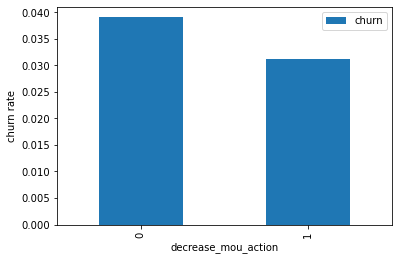

In [226]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

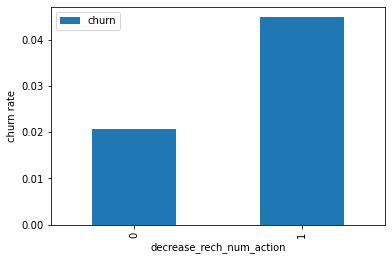

In [227]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

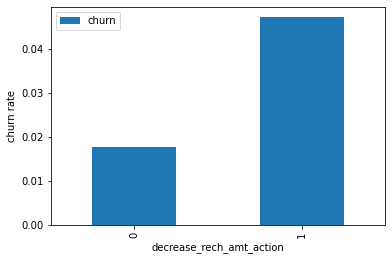

In [228]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

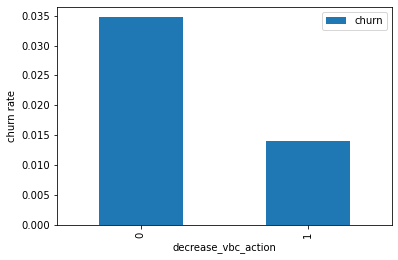

In [229]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [230]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

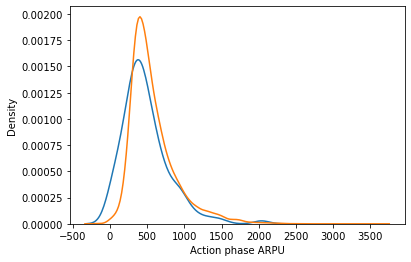

In [231]:
# Distribution plot
ax = sns.distplot(data_churn['arpu_7'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_7'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase MOU')]

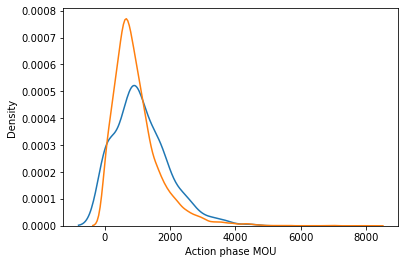

In [232]:
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

#### Bivariate analysis

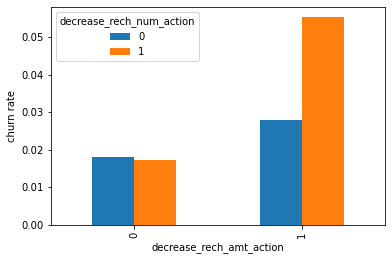

In [233]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

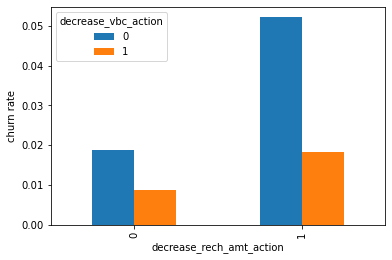

In [234]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

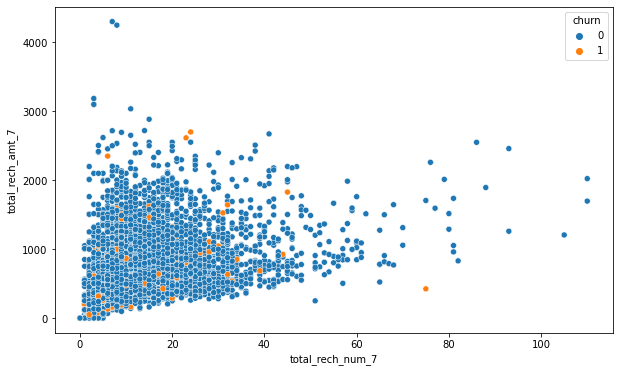

In [235]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('total_rech_num_7','total_rech_amt_7', hue='churn', data=data)

In [236]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','diff_rech_num',
                 'diff_rech_amt','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)


# MODEL CREATION

In [237]:
# Import library
from sklearn.model_selection import train_test_split

In [238]:
# Putting feature variables into X
X = data.drop(['id','churn'], axis=1)

In [239]:
# Putting target variable to y
y = data['churn']

In [240]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [241]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [242]:
sm = SMOTE(random_state=27)

In [243]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler()

In [246]:
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [247]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [248]:
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,-0.160983,1.162007,-0.127256,0.437095,0.486063,1.883677,-0.147454,-0.363012,-0.339296,-0.464806,-0.176422,-0.013707,0.482719,3.263079,-0.258659,-0.145614,-0.342800,-0.185519,0.203760,2.195053,-0.020415,0.538351,0.388164,0.433875,-0.167311,-0.130342,0.247732,0.667951,-0.0806,-0.090558,-0.305642,0.866011,-0.323456,-0.016647,0.323651,1.703597,-0.300458,-0.147592,-0.482849,-0.263128,0.140476,0.367520,-0.476557,-0.210766,0.414091,0.035888,-0.198910,-0.230794,-0.179978,-0.128196,0.0,0.037935,-0.427685,-0.213754,-0.425527,-0.062304,-0.178751,0.221603,0.186685,0.038303,-0.444484,0.063947,-0.181415,1.054636,-0.142944,0.114084,0.377799,-0.533580,1.761826,1.826191,-0.270595,-0.281617,-0.241658,-0.243363,1.950112,1.170636,-0.219693,-0.215696,-0.123979,-0.123501,1.063820,-0.269248,-0.282561,-0.261390,1,0,0,0,0
1,0.175205,0.709581,-0.565959,-0.053804,-0.559032,0.098719,-0.301691,-0.363012,-0.352509,-0.464806,-0.364372,-0.274357,-0.541580,-0.535236,-0.258659,-0.228006,9.132265,1.144798,-0.590861,-0.538400,-0.400878,0.126180,-0.360071,0.498291,-0.167311,-0.130342,-0.541179,0.421246,-0.0806,-0.090558,4.484146,1.272113,-0.323456,-0.016647,-0.694089,0.157697,-0.359455,-0.285807,-0.520031,-0.440360,-0.238937,-0.113453,-0.588679,-0.470127,-0.112097,-0.256202,0.304262,0.026501,-0.115396,-0.019428,0.0,0.166001,-0.483843,-0.468306,-0.425527,0.229414,-0.170904,-0.148144,-0.133961,-0.078262,1.971770,3.592113,0.172761,0.542878,-0.780704,-0.697214,-0.431253,-0.720533,0.565534,-0.216650,-0.270595,-0.281617,-0.241658,-0.243363,0.485737,-0.253573,-0.219693,-0.215696,-0.123979,-0.123501,-0.814168,-0.269248,-0.282561,-0.261390,1,0,0,0,0
2,-0.573149,-0.401929,-0.686430,-0.646122,-0.562389,-0.300699,-0.301691,-0.310323,-0.352509,-0.408209,-0.089768,-0.267135,-0.579115,-0.540976,-0.258659,-0.228006,-0.342800,0.737020,-0.453118,-0.538004,-0.634731,-0.514768,-0.233446,0.041592,-0.167311,-0.130342,-0.625708,-0.336806,-0.0806,-0.090558,-0.397090,0.017165,-0.323456,-0.016647,-0.822121,-0.571828,2.109501,0.145017,-0.439996,-0.436762,-0.251360,0.206570,0.772137,-0.199849,0.542198,0.406395,7.031461,6.727426,6.010959,3.414327,0.0,6.164712,2.931927,1.890619,-0.425527,-0.062304,-0.178751,-0.148144,-0.138945,-0.116796,-0.537417,-0.391300,-0.409296,-0.467381,0.870931,0.679948,-0.254921,-0.814009,-0.121394,-0.147048,0.464264,0.188013,-0.241658,-0.243363,0.485737,2.594845,2.367930,2.172418,-0.123979,-0.123501,-0.393536,0.277906,0.374479,0.750046,1,0,1,1,1
3,-1.069039,-0.546427,-0.436791,-0.217921,-0.602869,-0.296102,-0.301691,-0.363012,-0.352509,-0.464806,0.112606,-0.048705,-0.093404,0.101417,-0.258659,-0.228006,0.337064,-0.225832,-0.009186,0.026938,-0.453878,-0.151254,-0.514829,-0.259

In [249]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
14004,0.716523,-0.038563,-0.571566,-0.361238,-0.457180,-0.447044,-0.301691,-0.363012,-0.352509,-0.464806,0.236959,0.494759,0.432706,0.243857,-0.060318,-0.228006,-0.342800,-0.225832,0.425937,0.446028,-0.643464,-0.548149,-0.640994,-0.553230,1.488251,1.533850,-0.887520,-0.727366,-0.080600,-0.090558,-0.397090,-0.362067,-0.323456,-0.016647,-0.663845,-0.462042,0.227472,0.712624,0.277113,0.257824,-0.148872,-0.083995,0.292763,0.540238,-0.270042,-0.256202,-0.332616,-0.284862,0.097228,0.450939,0.0,-0.378901,0.086772,0.347801,-0.425527,-0.062304,-0.178751,-0.148144,-0.133961,-0.097529,-0.630350,-0.960359,0.098631,-0.300331,0.870931,0.679948,0.294820,1.541597,0.404452,0.578445,2.480674,2.557175,-0.241658,-0.243363,-0.246451,-0.253573,4.955553,2.172418,-0.123979,-0.123501,1.662764,4.157746,4.955850,4.655956,1,1,1,1,0
2709,-0.271886,-0.208825,-0.208360,-0.291906,-0.643263,-0.662127,-0.301691,-0.363012,-0.352509,-0.464806,-0.140471,-0.259969,-0.140407,-0.249041,-0.106373,-0.176000,0.345670,-0.225832,-0.182522,-0.332942,-0.115853,-0.136573,-0.555609,-0.484350,-0.167311,-0.130342,-0.466243,-0.424316,0.378151,-0.075020,0.934216,0.111821,1.146801,-0.016647,-0.503247,-0.549855,0.035980,0.022158,0.598646,0.875051,0.250470,0.492048,0.474217,0.684510,0.328150,0.630234,0.085026,0.099185,-0.179978,-0.128196,0.0,0.211675,0.474192,0.689159,2.963456,-0.062304,-0.178751,-0.147535,0.248156,-0.116796,-0.351551,-0.049864,-0.304965,-0.226086,-0.290119,-0.288156,-0.431253,-0.206412,-0.243382,-0.216650,-0.270595,-0.281617,-0.241658,-0.243363,-0.246451,-0.253573,-0.219693,-0.215696,1.506893,-0.123501,0.145972,-0.269248,-0.282561,-0.261390,1,0,1,1,0
8032,2.113002,2.909125,0.992740,0.808633,-0.357360,0.517551,-0.292846,-0.363012,-0.328872,-0.464806,0.845611,0.712800,-0.078400,-0.016067,-0.061547,-0.211645,0.319852,-0.225832,0.445726,0.400203,0.744941,0.614039,-0.265955,0.711678,-0.167311,-0.130342,0.360805,0.907973,-0.080600,-0.090558,0.347089,1.087688,3.853311,-0.016647,0.573938,1.056864,2.533091,1.219211,0.190979,0.083060,0.462694,-0.191116,1.541157,0.669455,-0.177312,-0.242510,-0.239755,-0.188209,-0.179978,-0.128196,0.0,-0.286754,1.238649,0.471114,2.273107,1.688001,-0.178751,-0.148144,0.904402,0.060460,3.551628,6.437407,1.954623,2.730446,-0.780704,-0.594950,-0.431253,-0.206412,-0.243382,-0.216650,-0.270595,-0.281617,-0.241658,-0.243363,-0.246451,-0.253573,-0.219693,-0.215696,-0.123979,-0.123501,-0.358102,-0.269248,-0.282561,-0.261390,1,0,0,0,0
19629,-0.615900,-0.125954,-0.427619,-0.381738,-0.721121,-0.460049,-0.301691,-0.363012,-0.352509,-0.464806,0.618541,0.445318,-0.185807,0.236706,1.163499,0.631558,-0.342800,-0.225832,0.304096,0.460369,-0.643464,-0.548149,-0.644450,-0.

In [250]:
#Import PCA
from sklearn.decomposition import PCA

In [251]:
# Instantiate PCA
pca = PCA(random_state=22)

In [252]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=22)

In [253]:
pca.components_

array([[ 7.96278997e-02,  1.43789314e-01, -3.38478926e-02, ...,
        -1.65448803e-02, -1.65448803e-02,  1.95955486e-02],
       [ 1.98150794e-01,  1.45328100e-01,  2.15170220e-01, ...,
         1.10973930e-02,  1.10973930e-02, -1.68047231e-02],
       [ 1.43740012e-01,  2.23583745e-01,  2.31691512e-02, ...,
        -3.28707172e-02, -3.28707172e-02,  2.69907697e-02],
       ...,
       [-6.43503389e-07,  2.28097880e-07,  8.76739575e-06, ...,
         4.48220339e-08,  4.48247392e-08, -3.58969135e-07],
       [ 0.00000000e+00, -2.09011603e-17, -4.69449030e-15, ...,
         2.37318089e-02, -2.37318089e-02,  1.41239787e-17],
       [ 0.00000000e+00, -1.51137155e-17, -4.76962616e-16, ...,
        -7.06708427e-01,  7.06708427e-01,  3.61976236e-17]])

In [254]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11042212 0.20715793 0.26339198 0.31028025 0.35309557 0.39237796
 0.43070291 0.46421803 0.49183619 0.51858055 0.54441247 0.56917995
 0.59284274 0.61583564 0.63654831 0.6549208  0.67272395 0.68901644
 0.70352529 0.71757137 0.73063274 0.74334065 0.75558047 0.76769856
 0.77948685 0.79101161 0.80217087 0.81271616 0.8227639  0.83255948
 0.84217166 0.85125679 0.8598655  0.86787152 0.8755401  0.88306706
 0.89002126 0.89650141 0.90259843 0.90852325 0.91433881 0.92001538
 0.92544055 0.93038266 0.93505179 0.93937852 0.94351504 0.94763442
 0.95153608 0.95535084 0.95904273 0.96256776 0.96597027 0.96923599
 0.97212578 0.97487986 0.97745393 0.97992192 0.9823402  0.98473752
 0.98707871 0.98935391 0.99155909 0.99322258 0.9945731  0.99575723
 0.99683211 0.99768631 0.99851751 0.99903474 0.99946011 0.99983741
 0.99996899 0.99999871 0.9999998  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


Text(0, 0.5, 'Cumulative Variance')

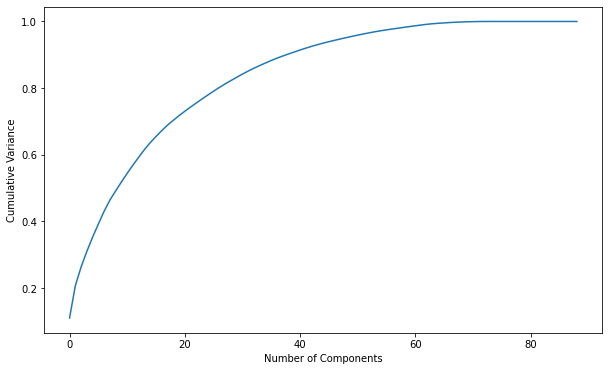

In [255]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [256]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [257]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [258]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [259]:
X_test_pca = pca_final.transform(X_test)

In [260]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [261]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [262]:

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [263]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [264]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035823,0.010364,0.002067,0.000313,0.01,{'C': 0.01},0.929323,0.924499,0.916409,0.924801,0.941045,0.927215,0.008071,6,0.929418,0.926848,0.931228,0.926616,0.928531,0.928528,0.001707
1,0.055641,0.002507,0.001985,0.000180,0.1,{'C': 0.1},0.935338,0.925270,0.922601,0.926970,0.943284,0.930693,0.007601,5,0.933559,0.931338,0.934592,0.932129,0.929285,0.932181,0.001834
2,0.080383,0.002842,0.001890,0.000143,1,{'C': 1},0.937594,0.927581,0.924923,0.927693,0.945522,0.932663,0.007747,1,0.935441,0.931525,0.934592,0.933650,0.932114,0.933464,0.001470
3,0.079373,0.003306,0.002187,0.000266,10,{'C': 10},0.936090,0.928351,0.924923,0.926247,0.945522,0.932227,0.007692,3,0.935253,0.931712,0.934779,0.934411,0.931548,0.933540,0.001583
4,0.087097,0.006447,0.002148,0.000208,100,{'C': 100},0.936090,0.928351,0.924923,0.927693,0.945522,0.932516,0.007486,2,0.935253,0.932273,0.934965,0.934601,0.931360,0.933690,0.001571
5,0.080733,0.000387,0.002061,0.000210,1000,{'C': 1000},0.936090,0.928351,0.924923,0.926247,0.945522,0.932227,0.007692,3,0.935253,0.932460,0.934965,0.933840,0.931171,0.933538,0.001538


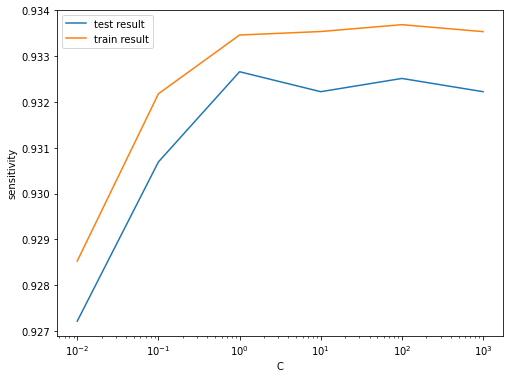

In [265]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [266]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.932662657485024 at C = 1


In [267]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [268]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [269]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [270]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[5539 1104]
 [ 445 6198]]


In [271]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [272]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8834111094385066
Sensitivity:- 0.9330121932861659
Specificity:- 0.8338100255908475


In [273]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [274]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1394  273]
 [  11   40]]


In [275]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [276]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8346915017462165
Sensitivity:- 0.7843137254901961
Specificity:- 0.8362327534493101


### Decision tree with PCA

In [277]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [278]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [279]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.293640,0.013301,0.002079,0.000206,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.878856,0.951054,0.929217,0.917231,0.914221,0.918116,0.023518,1
1,0.296565,0.003927,0.002198,0.000225,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.878856,0.951054,0.929217,0.917231,0.914221,0.918116,0.023518,1
2,0.288197,0.001296,0.001947,0.000039,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.881866,0.945030,0.909639,0.887886,0.925508,0.909986,0.023445,3
3,0.285982,0.000403,0.002021,0.000145,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.881866,0.945030,0.909639,0.887886,0.925508,0.909986,0.023445,3
4,0.425680,0.009919,0.002005,0.000058,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.873589,0.899096,0.904367,0.890895,0.881866,0.889963,0.011184,5
5,0.426587,0.015245,0.002102,0.000193,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.873589,0.899096,0.904367,0.890895,0.881866,0.889963,0.011184,5
6,0.386285,0.004506,0.001950,0.000031,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881114,0.899849,0.879518,0.863807,0.883371,0.881532,0.011466,7
7,0.387755,0.005776,0.001988,0.000110,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881114,0.899849,0.879518,0.863807,0.883371,0.881532,0.011466,7


In [280]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9181159173941816
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [281]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [282]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [283]:
y_train_pred.size, y_train_pred.size

(13286, 13286)

In [284]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[5732  911]
 [ 501 6142]]


In [285]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [286]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8937227156405239
Sensitivity:- 0.9245822670480205
Specificity:- 0.8628631642330272


In [287]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [288]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1395  272]
 [  18   33]]


In [289]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [290]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8311990686845169
Sensitivity:- 0.6470588235294118
Specificity:- 0.8368326334733054
